# Football Odds - Reliability Predictor
Find out the most trustworthy football game out of all the scheduled English Premier League matches for tomorrow. 

![deduced.PNG](img/deduced.PNG)
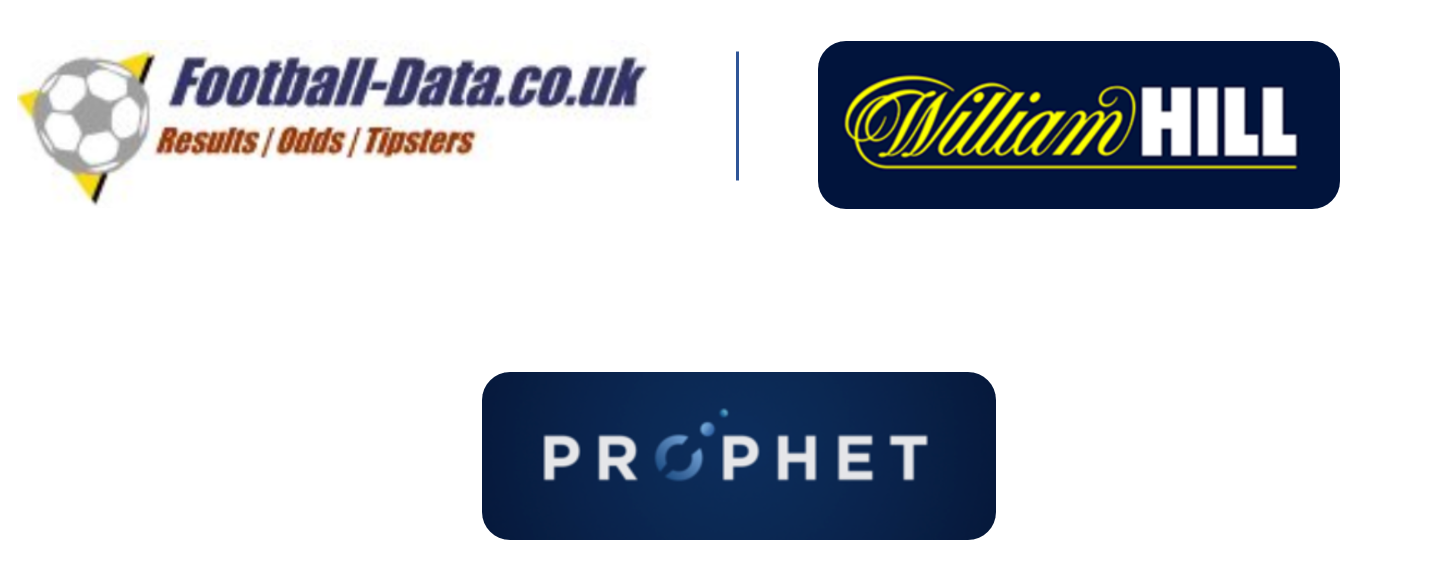

# Phases:

1. Fetch all the historical betting odds data from season 2000/2001 onwards - every time the code executes it fetches the most updated data for the current season - and compute the average odds value (among all the available betting companies) for each particular match played for the three potential results Home/Draw/Away separately.

2. Scrape the William Hill bookmaker page and bring the list of all the scheduled English Premier League tomorrow's matches along with their offered odds for each potential outcome Home/Draw/Away.

3. For each one of the upcoming matches, filter out the initial database accordingly in order to keep only the given pair of teams over the years (and the respective odds). So, given the exact date of each game, and representing each of the three outcomes Home/Draw/Away as value y, can predict the next value of each of the three possible results as a time series next step. This is done utilizing the famous Facebook's Prophet forecasting algorithm which is robust to missing data, shifts in the trend, and large outliers.

4. Compute the sum of the distances between the three results among the offered and the predicted values for each one of the listed matches and pick the one with the minimum sum of distances. This is considered as the most reliable game to potentially bet on.

# Import Dependencies

In [1]:
import pandas as pd
from datetime import datetime as dt
import requests
import io

from bs4 import BeautifulSoup
import urllib.request
from fractions import Fraction

from fbprophet import Prophet
from decimal import Decimal

# Define Functions

In [2]:
# Parse data as time
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%d/%m/%y').date()

# Parse data as time - different year format   
def parse_date_other(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%d/%m/%Y').date()

def url_to_soup(url):
    request = urllib.request.Request(url)
    response = urllib.request.urlopen(request)
    soup = BeautifulSoup(response, "html.parser")
    return soup

def apply_prophet(slice_type):
    model = Prophet()
    model.fit(slice_type)
    
    future_data = model.make_future_dataframe(periods=1)
    forecast_data = model.predict(future_data)
    
    forecast = '%.2f' % round(forecast_data.tail(1).yhat.values[0], 2)
    
    if float(Decimal(forecast))<1:
        return 1
    else:
        return float(Decimal(forecast))

# Data Preparation

• Load data till season 2016/2017 - saved locally.<br />
• Fetch the most updated data from season 2017/2018.<br />
• Parse date in datetime format.<br />
• Compute average odds per game for Home/Draw/Away separately.<br />
• Filter out the useful columns.<br />
• Compose the deduced merged dataset.

In [3]:
loc = "C:/Users/alexd/OneDrive/Documents/englandm/"

raw_data_1 = pd.read_csv(loc + '2000_2001.csv')
raw_data_2 = pd.read_csv(loc + '2001_2002.csv')
raw_data_3 = pd.read_csv(loc + '2002_2003.csv')
raw_data_4 = pd.read_csv(loc + '2003_2004.csv')
raw_data_5 = pd.read_csv(loc + '2004_2005.csv', encoding='cp1252')
raw_data_6 = pd.read_csv(loc + '2005_2006.csv')
raw_data_7 = pd.read_csv(loc + '2006_2007.csv')
raw_data_8 = pd.read_csv(loc + '2007_2008.csv')
raw_data_9 = pd.read_csv(loc + '2008_2009.csv')
raw_data_10 = pd.read_csv(loc + '2009_2010.csv')
raw_data_11 = pd.read_csv(loc + '2010_2011.csv')
raw_data_12 = pd.read_csv(loc + '2011_2012.csv')
raw_data_13 = pd.read_csv(loc + '2012_2013.csv')
raw_data_14 = pd.read_csv(loc + '2013_2014.csv')
raw_data_15 = pd.read_csv(loc + '2014_2015.csv')
raw_data_16 = pd.read_csv(loc + '2015_2016.csv')
raw_data_17 = pd.read_csv(loc + '2016_2017.csv')

# Get the most updated data from the current season
data = requests.get('http://football-data.co.uk/mmz4281/1718/E0.csv').content
raw_data_18 = pd.read_csv(io.StringIO(data.decode('utf-8')))


for i in range(1, 19):
    df_name = ''.join(['raw_data_', str(i)])
    df_name = eval(df_name)
    
    # Properly parse the columns containing dates
    try:
        df_name.Date = df_name.Date.apply(parse_date)
    except:
        try:
            df_name.Date = df_name.Date.apply(parse_date_other)
        except Exception as e:
            print(e)
    # Compute the average of the columns with column name ending with H, D, A for each dataframe respectively
    df_name['avgH'] = df_name.iloc[:, pd.Series(map(lambda x : str(x)[-1]=='H', df_name.columns)).values].mean(axis=1)
    df_name['avgD'] = df_name.iloc[:, pd.Series(map(lambda x : str(x)[-1]=='D', df_name.columns)).values].mean(axis=1)
    df_name['avgA'] = df_name.iloc[:, pd.Series(map(lambda x : str(x)[-1]=='A', df_name.columns)).values].mean(axis=1)

# Keep only the useful columns
columns_req = ['Date','HomeTeam','AwayTeam','avgH','avgD','avgA']

data_1 = raw_data_1[columns_req]                      
data_2 = raw_data_2[columns_req]
data_3 = raw_data_3[columns_req]
data_4 = raw_data_4[columns_req]
data_5 = raw_data_5[columns_req]
data_6 = raw_data_6[columns_req]
data_7 = raw_data_7[columns_req]
data_8 = raw_data_8[columns_req]
data_9 = raw_data_9[columns_req]
data_10 = raw_data_10[columns_req]
data_11 = raw_data_11[columns_req]   
data_12 = raw_data_12[columns_req]
data_13 = raw_data_13[columns_req]
data_14 = raw_data_14[columns_req]
data_15 = raw_data_15[columns_req]
data_16 = raw_data_16[columns_req]
data_17 = raw_data_17[columns_req]
data_18 = raw_data_18[columns_req]

# FINAL DATAFRAME
playing_stat = pd.concat([data_1,
                          data_2,
                          data_3,
                          data_4,
                          data_5,
                          data_6,
                          data_7,
                          data_8,
                          data_9,
                          data_10,
                          data_11,
                          data_12,
                          data_13,
                          data_14,
                          data_15,
                          data_16,
                          data_17,
                          data_18], ignore_index=True)

In [5]:
playing_stat.tail()

,Date,HomeTeam,AwayTeam,avgH,avgD,avgA
6685,2018-01-13,Watford,Southampton,3.723077,3.355,2.765833
6686,2018-01-13,West Brom,Brighton,3.453077,3.072,3.844167
6687,2018-01-14,Bournemouth,Arsenal,5.259231,4.033,1.807500
6688,2018-01-14,Liverpool,Man City,4.105385,3.631,2.244167
6689,2018-01-15,Man United,Stoke,2.691538,6.775,12.262500


# Parse William Hill website & fetch tomorrow's matches (if any)
# Compute the respective distances among Home/Draw/Away for every pair
# Print result

Special attention paid in "no scheduled match for tomorrow" and "not enough data for the specific matchday pairs" cases.

In [6]:
# Get tomorrow's odds
url = 'http://sports.williamhill.com/bet/en-gb/betting/y/5/tm/1/Football.html'

this_soup = url_to_soup(url)

english_premier_league = this_soup.find("div", {"id": "ip_type_295"})

if english_premier_league is not None:

    lst=[]
    
    for tr in english_premier_league.find_all("tr", {"class":"rowOdd"}):
        this_dict = {}
        i=0
        for td in tr.find_all("td"):
            if not td.text == '\n\n' and not td.text == '\n' and "Bets" not in td.text:
                if i==0:
                    this_dict["date"] = td.text.strip()
                    i+=1
                elif i==1:
                    this_dict["time"] = td.text.strip()
                    i+=1
                elif i==2:
                    this_dict["homeTeam"] = td.text.split("\n")[1].split("\xa0")[0].strip()
                    this_dict["awayTeam"] = td.text.split("\n")[1].split("\xa0")[-1].strip()
                    i+=1
                elif i==3:
                    oddH = td.text.split("\n\n\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t")[1].split("\n\t\t\t\t\n\t\t\t\n\t\t\t\n\t\t\n\n\n")[0].strip()
                    # EVS: For every 1 unit you stake, you will receive 1 unit if you win (plus your stake)
                    if not oddH == 'EVS':
                        this_dict["oddH"] = round(float(Fraction(oddH))+1, 2)
                    else:
                        this_dict["oddH"] = 2
                    i+=1
                elif i==4:
                    oddD = td.text.split("\n\n\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t")[1].split("\n\t\t\t\t\n\t\t\t\n\t\t\t\n\t\t\n\n\n")[0].strip()
                    if not oddD == 'EVS':
                        this_dict["oddD"] = round(float(Fraction(oddD))+1, 2)
                    else:
                        this_dict["oddD"] = 2
                    i+=1
                elif i==5:
                    oddA = td.text.split("\n\n\n\t\t\t\n\t\t\t\n\t\t\t\t\n\t\t\t\t\t")[1].split("\n\t\t\t\t\n\t\t\t\n\t\t\t\n\t\t\n\n\n")[0].strip()
                    if not oddA == 'EVS':
                        this_dict["oddA"] = round(float(Fraction(oddA))+1, 2)
                    else:
                        this_dict["oddA"] = 2
                    i+=1
                lst.append(this_dict)
                
    up_matches = pd.DataFrame.from_dict(lst)
    up_matches.drop_duplicates(inplace=True)
    up_matches = up_matches.reset_index(drop=True)
    up_matches = up_matches.replace("Man Utd", "Man United")

    pred=[]
    
    for team_no in range(0, up_matches.shape[0]):
        pred_dict = {}
        hTeam = up_matches.homeTeam[team_no]
        aTeam = up_matches.awayTeam[team_no]
        pred_dict['homeTeam'] = hTeam
        pred_dict['awayTeam'] = aTeam
    
        playing_stat_temp = playing_stat[(playing_stat.HomeTeam == hTeam) & 
                                         (playing_stat.AwayTeam == aTeam)]
        
        if len(playing_stat_temp) != 0:
            for odd_type in ['avgH', 'avgD', 'avgA']:
                # Convert gradually all the odd categories into time series.
                playing_stat_slice = playing_stat_temp[['Date',odd_type]].reset_index(drop=True)
                playing_stat_slice.rename(columns={'Date': 'ds', odd_type: 'y'}, inplace=True)
                
                pred_dict[odd_type] = apply_prophet(playing_stat_slice)
                print()
                
            pred.append(pred_dict)
        else:
            # Not enough data for the specific pair.
            continue
    
    pred_odds = pd.DataFrame.from_dict(pred)
    
    if len(pred_odds) != 0:
        
        dist=[]
        
        for team_no in range(0, up_matches.shape[0]):
            dist_dict={}
            dist_dict['homeTeam'] = up_matches.homeTeam.values[0]
            dist_dict['awayTeam'] = up_matches.awayTeam.values[0]
            dist_dict['time'] = up_matches.time.values[0]
            dist_dict['date'] = up_matches.date.values[0]
            dist_dict['predH'] = pred_odds.avgH.values[0]
            dist_dict['predD'] = pred_odds.avgD.values[0]
            dist_dict['predA'] = pred_odds.avgA.values[0]
            dist_dict['whH'] = up_matches.oddH.values[0]
            dist_dict['whD'] = up_matches.oddD.values[0]
            dist_dict['whA'] = up_matches.oddA.values[0]
            
            dist_dict['dist'] = float(abs(up_matches.oddH - pred_odds.avgH) +
                                abs(up_matches.oddD - pred_odds.avgD) + 
                                abs(up_matches.oddA - pred_odds.avgA))
            
            dist.append(dist_dict)
            
        dist_from_pred = pd.DataFrame.from_dict(dist)
        
        min_dist_match = dist_from_pred.loc[dist_from_pred.dist.idxmin()]
        
        print("Most trustworthy game for tomorrow " + min_dist_match.date + ": " + 
              min_dist_match.homeTeam + " - " + min_dist_match.awayTeam + 
              " at " + min_dist_match.time)
        print()
        print("Predicted odds for Home/Draw/Away: " + str(min_dist_match.predH) +
              "/" + str(min_dist_match.predD) + "/" + str(min_dist_match.predA))
        print()
        print("William Hill odds for Home/Draw/Away: " + 
              str(min_dist_match.whH) + "/" + str(min_dist_match.whD) + "/" +
              str(min_dist_match.whA))
    else:
        print("Not enough data for this matchday pairs.")

else:
    print()
    print("No scheduled English Premier League matches for tomorrow.")

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 3.0.
INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 3.0.


INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet.forecaster:n_changepoints greater than number of observations.Using 3.0.




Most trustworthy game for tomorrow 22 Jan: Swansea - Liverpool at 20:00 UK

Predicted odds for Home/Draw/Away: 5.63/10.91/1

William Hill odds for Home/Draw/Away: 11.0/5.5/1.3
